# Session 7: data analysis
- sample project
- twitter data
- more data: mobility

### project lists
- stocks
- online classes and quality
- retail
- crime
  

## twitter data
- filename: 2020-07-06_top1000bigrams.csv

In [44]:
#tw = pd.read_csv('data/2020-07-06_top1000bigrams.csv')
tw = pd.read_csv('../sample-code/data/covid-term/2020-05-03_top1000terms.csv', header=None,names=['term','frequency'])
#tw.set_index('term',inplace=True)
a=tw[tw['term']=='covid']
b=a.set_index(pd.Index(range(a.shape[0])))
b.loc[0,'frequency']
tw.head(20)

,term,frequency
0,coronavirus,328383
1,covid,203800
2,19,193076
3,covid19,167520
4,NaN,62057
5,people,46485
6,amp,44220
7,cases,39189
8,new,38259
9,via,35970


In [43]:
import pandas as pd
from pandas import Series, DataFrame

#tw = pd.read_csv('data/2020-07-06_top1000bigrams.csv')
#tw.head(20)

# read all files
t_range=pd.date_range('2020-03-22','2020-07-06')
#t_range
keywords=['covid','coronavirus','trump','google','china','wuhan','virus']
keywords=['trump','google','china','wuhan','virus','doctor','cuomo']

df = DataFrame(index=t_range)
folder='../sample-code/data/covid-term/'

for d in t_range:
    filename=folder + str(d)[:10] + '_top1000terms.csv'
    #print('filename --> ',filename)
    tw = pd.read_csv(filename, header=None, names=['term','frequency'])
    
    for key in keywords:
        tw_short=tw[tw['term']==key]
        if tw_short.shape[0]==0:
            f=0
        else:
            tw_short2=tw_short.set_index(pd.Index(range(tw_short.shape[0])))        
            f=tw_short2.loc[0,'frequency']
        df.loc[d,key]=f
    

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

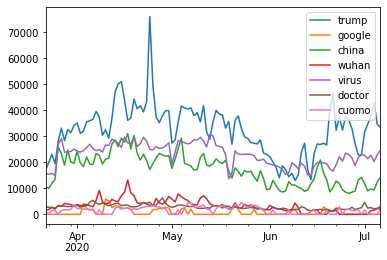

In [45]:
df.plot()

### More to do
- check the frequency with weekdays and weekends
- check degree of anxiety from the keywords, and relate to daily new cases